<a href="https://colab.research.google.com/github/Krish9095/AI_ML_Data-Science_Roadmap/blob/main/Face%20recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"krishsavani29","key":"4720e161a0c35f6cd8defa40a17b42da"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mnist-dataset' dataset.
Path to dataset files: /kaggle/input/mnist-dataset


In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {x_train.shape}")

Train reshaped: (60000, 28, 28, 1)


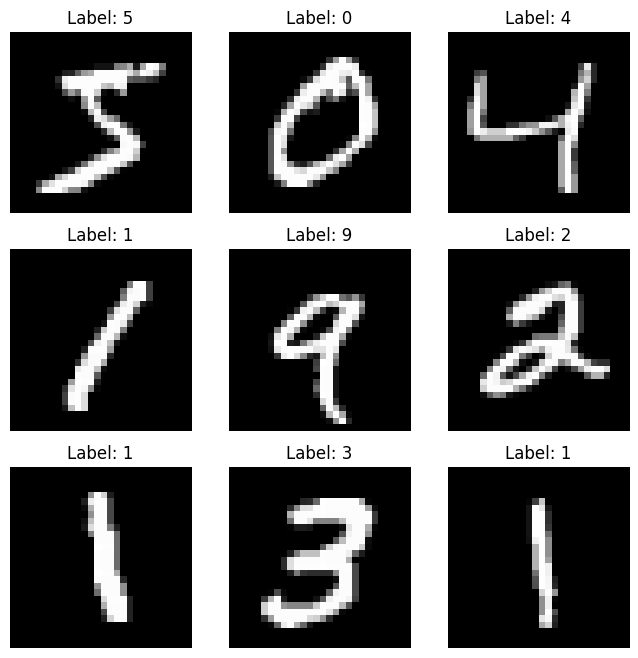

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28), cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

In [ ]:
(x_train_c10, y_train_c10), (x_test_c10,y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f"CIFAR-10 train shape: {x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.9036 - loss: 0.3165 - val_accuracy: 0.9849 - val_loss: 0.0532
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9849 - loss: 0.0494 - val_accuracy: 0.9866 - val_loss: 0.0446
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9911 - loss: 0.0279 - val_accuracy: 0.9887 - val_loss: 0.0386
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9949 - loss: 0.0174 - val_accuracy: 0.9883 - val_loss: 0.0465
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9944 - loss: 0.0167 - val_accuracy: 0.9898 - val_loss: 0.0369


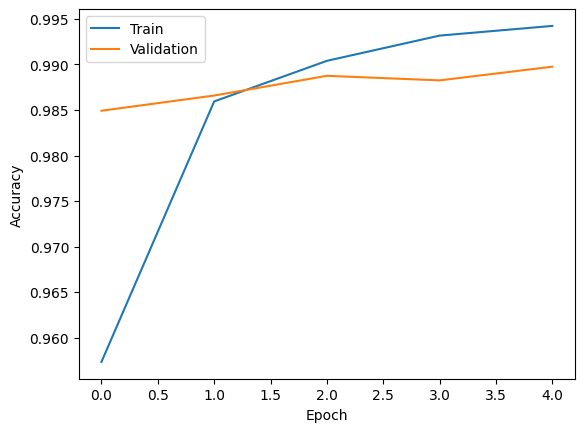

In [ ]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9865 - loss: 0.0408
Test Accuracy:{test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 76ms/step - accuracy: 0.3347 - loss: 1.8068 - val_accuracy: 0.5157 - val_loss: 1.2994
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 76ms/step - accuracy: 0.5271 - loss: 1.3235 - val_accuracy: 0.5749 - val_loss: 1.2216
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.5896 - loss: 1.1755 - val_accuracy: 0.6540 - val_loss: 0.9780
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.6126 - loss: 1.0983 - val_accuracy: 0.6540 - val_loss: 0.9883
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - accuracy: 0.6362 - loss: 1.0438 - val_accuracy: 0.6527 - val_loss: 0.9960
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.6514 - loss: 1.0015 - val_accuracy: 0.6341 - val_loss: 1.0541
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.6637 - loss: 0.9736 - val_accuracy: 0.6666 - val_loss: 1.0050
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 74ms/step - accuracy: 0.6697 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.77      0.70      0.74      1000
           1       0.85      0.78      0.81      1000
           2       0.77      0.42      0.54      1000
           3       0.57      0.46      0.51      1000
           4       0.64      0.72      0.67      1000
           5       0.67      0.57      0.62      1000
           6       0.68      0.85      0.75      1000
           7       0.69      0.80      0.74      1000
           8       0.90      0.72      0.80      1000
           9       0.56      0.93      0.70      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000



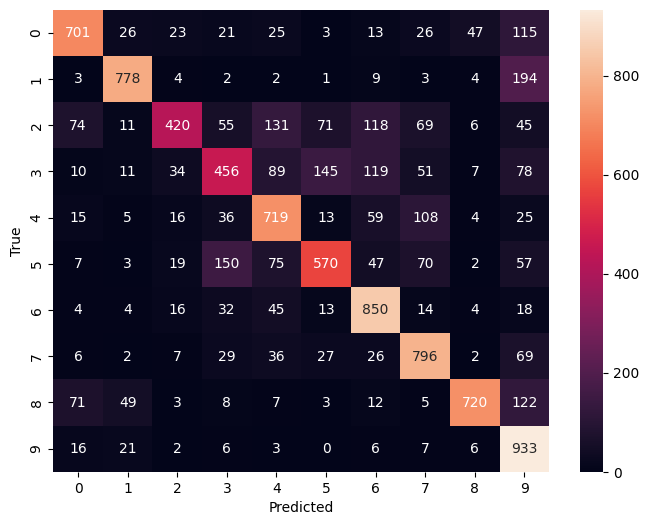

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 87% 189M/218M [00:00<00:00, 314MB/s] 
100% 218M/218M [00:00<00:00, 279MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(244,244),
    batch_size=32,
    class_mode='binary',
    subset='training'
    )
val_generator=datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(244,244),
    batch_size=32,
    class_mode='binary',
    subset='training'
    )

Found 8023 images belonging to 2 classes.
Found 8023 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(244,244,3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

Found 8023 images belonging to 2 classes.
Found 8023 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 643s 3s/step - accuracy: 0.7844 - loss: 0.5417 - val_accuracy: 0.7983 - val_loss: 0.4964
Epoch 2/5
201/251 ━━━━━━━━━━━━━━━━━━━━ 1:02 1s/step - accuracy: 0.7951 - loss: 0.5006

KeyboardInterrupt: 

In [ ]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy']
              )
model.fit(train_generator,epochs=5,validation_data=val_generator)

In [ ]:
model.save('mobilnet_cats_dogs.h5')
# To load
import tensorflow as tf
loaded_model = tf.keras.models.load_model('mobilnet_cats_dogs.h5')

In [ ]:
from sklearn.metrics import roc_curve,auc
y_pred_proba=loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)

roc_auc=auc(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()